In [1]:
import pandas as pd
import numpy as np
import requests
pd.set_option('display.max_columns', 135)
pd.set_option('display.max_rows', 135)


from datetime import timedelta, datetime
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import re

In [3]:
df = pd.read_csv('climate_data_austin.csv')

In [4]:
df.shape

(4718, 34)

In [5]:
df.tail()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT11,WT11_ATTRIBUTES
4713,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,2019-01-27,NaN,NaN,NaN,NaN,0.55,",,7,0730",0.0,",,7",0.0,",,7",58.0,",,7",39.0,",,7",42.0,",,7,0730",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4714,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,2019-01-28,NaN,NaN,NaN,NaN,0.00,",,7,0730",0.0,",,7",0.0,",,7",60.0,",,7",40.0,",,7",40.0,",,7,0730",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4715,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,2019-01-29,NaN,NaN,NaN,NaN,0.00,",,7,0730",0.0,",,7",0.0,",,7",67.0,",,7",34.0,",,7",34.0,",,7,0730",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4716,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,2019-01-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,7",0.0,",,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4717,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,2019-01-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,",,7",0.0,",,7",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#check for null values
df.isnull().sum()

STATION               0
NAME                  0
LATITUDE              0
LONGITUDE             0
ELEVATION             0
DATE                  0
DAPR               4710
DAPR_ATTRIBUTES    4710
MDPR               4709
MDPR_ATTRIBUTES    4709
PRCP                105
PRCP_ATTRIBUTES     105
SNOW               1151
SNOW_ATTRIBUTES    1151
SNWD               1151
SNWD_ATTRIBUTES    1151
TMAX                 58
TMAX_ATTRIBUTES      58
TMIN                 54
TMIN_ATTRIBUTES      54
TOBS                 66
TOBS_ATTRIBUTES      66
WT01               4600
WT01_ATTRIBUTES    4600
WT03               4498
WT03_ATTRIBUTES    4498
WT04               4715
WT04_ATTRIBUTES    4715
WT05               4715
WT05_ATTRIBUTES    4715
WT06               4717
WT06_ATTRIBUTES    4717
WT11               4699
WT11_ATTRIBUTES    4699
dtype: int64

In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])


In [7]:
df = df.set_index('DATE')

In [8]:
df.head(2)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,WT01,WT01_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT11,WT11_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-02-01,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,NaN,NaN,NaN,NaN,0.0,",,0,",0.0,"P,,0",NaN,NaN,60.0,",,0",36.0,",,0",50.0,",,0,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-02,USC00410431,"AUSTIN 6 S, TX US",30.2247,-97.7327,173.7,NaN,NaN,NaN,NaN,0.0,",,0,0700",0.0,"P,,0",0.0,"P,,0",62.0,",,0",39.0,",,0",41.0,",,0,0700",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
by_date = df.reset_index()


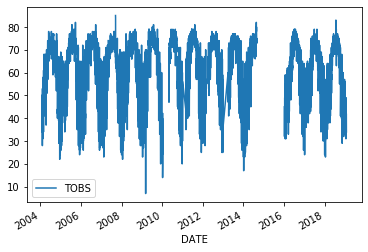

In [10]:
by_date.plot(x = 'DATE', y = 'TOBS' )

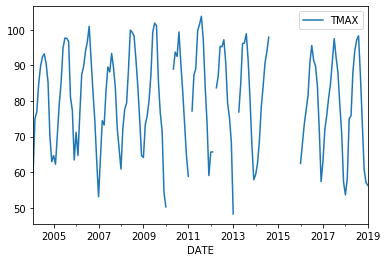

In [11]:
#resample monthly
df.resample('M').mean().reset_index().plot(x = 'DATE', y = "TMAX")

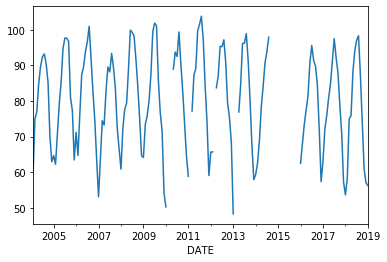

In [17]:
#resample start of month
df.TMAX.resample('MS').mean().plot()
plt.show()

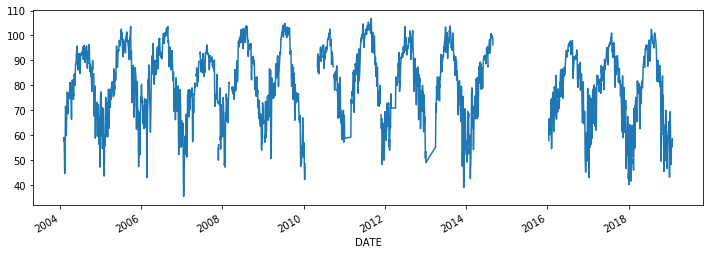

In [18]:
df.TMAX.rolling(5).mean().plot(figsize=(12, 4))

(74, 80)

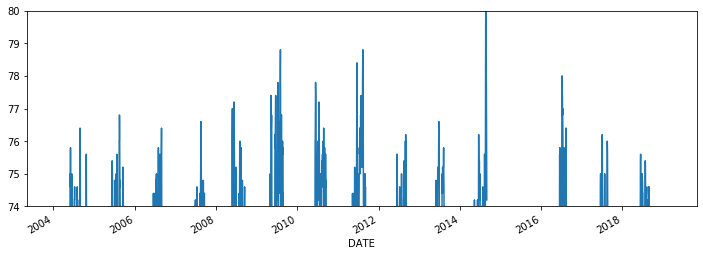

In [21]:
df.TOBS.rolling(5).mean().plot(figsize=(12, 4))
plt.ylim(74,80)

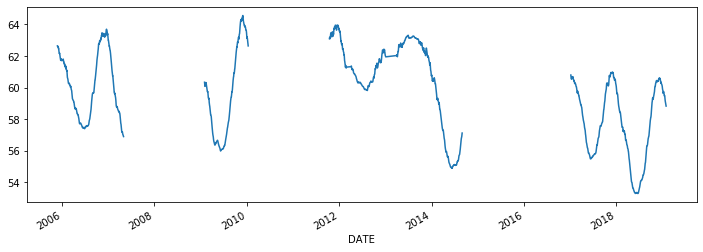

In [23]:
df.TOBS.rolling(300).mean().plot(figsize=(12, 4))
# plt.ylim(74,80)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4652 entries, 2004-02-01 to 2019-01-29
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          4652 non-null   object 
 1   NAME             4652 non-null   object 
 2   LATITUDE         4652 non-null   float64
 3   LONGITUDE        4652 non-null   float64
 4   ELEVATION        4652 non-null   float64
 5   DAPR             8 non-null      float64
 6   DAPR_ATTRIBUTES  8 non-null      object 
 7   MDPR             9 non-null      float64
 8   MDPR_ATTRIBUTES  9 non-null      object 
 9   PRCP             4581 non-null   float64
 10  PRCP_ATTRIBUTES  4581 non-null   object 
 11  SNOW             3501 non-null   float64
 12  SNOW_ATTRIBUTES  3501 non-null   object 
 13  SNWD             3501 non-null   float64
 14  SNWD_ATTRIBUTES  3501 non-null   object 
 15  TMAX             4645 non-null   float64
 16  TMAX_ATTRIBUTES  4645 non-null   object 
 

In [40]:
df1 = df[['TOBS']]

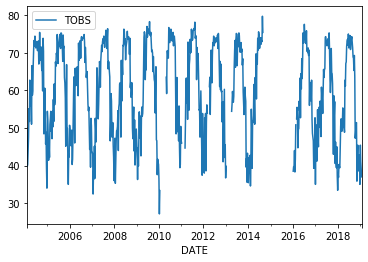

In [44]:
# df = df[df['TOBS'].notna()]
import statsmodels.api as sm

# decomposition = sm.tsa.seasonal_decompose(df1.resample('W').mean(), model='additive')
# fig = decomposition.plot()
# plt.show()

df1.resample('W').mean().plot()

In [2]:
df = pd.read_csv('austin_hourly.csv')

In [3]:
df.head(2)

,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupElevationUnit,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,CDSD,CLDD,DSNW,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyCoolingDegreeDays,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,DailyWeather,HDSD,HTDD,HeavyFog,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,MonthlyAverageRH,MonthlyDaysWithGT001Precip,MonthlyDaysWithGT010Precip,MonthlyDaysWithGT32Temp,MonthlyDaysWithGT90Temp,MonthlyDaysWithLT0Temp,MonthlyDaysWithLT32Temp,MonthlyDepartureFromNormalAverageTemperature,MonthlyDepartureFromNormalCoolingDegreeDays,MonthlyDepartureFromNormalHeatingDegreeDays,MonthlyDepartureFromNormalMaximumTemperature,MonthlyDepartureFromNormalMinimumTemperature,MonthlyDepartureFromNormalPrecipitation,MonthlyDewpointTemperature,MonthlyGreatestPrecip,MonthlyGreatestPrecipDate,MonthlyGreatestSnowDepth,MonthlyGreatestSnowDepthDate,MonthlyGreatestSnowfall,MonthlyGreatestSnowfallDate,MonthlyMaxSeaLevelPressureValue,MonthlyMaxSeaLevelPressureValueDate,MonthlyMaxSeaLevelPressureValueTime,MonthlyMaximumTemperature,MonthlyMeanTemperature,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyMinimumTemperature,MonthlySeaLevelPressure,MonthlyStationPressure,MonthlyTotalLiquidPrecipitation,MonthlyTotalSnowfall,MonthlyWetBulb,NormalsCoolingDegreeDay,NormalsHeatingDegreeDay,REM,REPORT_TYPE.1,SOURCE.1,ShortDurationEndDate005,ShortDurationEndDate010,ShortDurationEndDate015,ShortDurationEndDate020,ShortDurationEndDate030,ShortDurationEndDate045,ShortDurationEndDate060,ShortDurationEndDate080,ShortDurationEndDate100,ShortDurationEndDate120,ShortDurationEndDate150,ShortDurationEndDate180,ShortDurationPrecipitationValue005,ShortDurationPrecipitationValue010,ShortDurationPrecipitationValue015,ShortDurationPrecipitationValue020,ShortDurationPrecipitationValue030,ShortDurationPrecipitationValue045,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,TStorms,WindEquipmentChangeDate
0,72254013904,2013-01-01T00:00:00,FM-12,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54,55,NaN,NaN,-0.01,0.0,96.0,30.00,NaN,29.33,2.98,54.0,000,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SYN104AAXX 01064 72254 17248 80000 10128 2012...,FM-12,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-10-30
1,72254013904,2013-01-01T00:30:00,FM-16,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.98,54,55,0.04,-RA:02 BR:1 |RA |RA,NaN,NaN,94.0,NaN,BKN:07 3 OVC:08 25,29.45,2.50,54.0,350,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET09901/01/13 00:30:01 SPECI KAUS 010630Z 350...,FM-16,7,NaN,

In [4]:
def replace_s(string):
    return float(re.sub('s', '', string))

In [5]:
df['HourlyDryBulbTemperature'] = df.HourlyDryBulbTemperature.apply(str)

In [6]:
df['HourlyDryBulbTemperature'] = df.HourlyDryBulbTemperature.apply(lambda s: float(re.sub('s', '', s)))

In [7]:
df.HourlyDryBulbTemperature.isnull().sum()

2534

In [8]:
df['DATE'] = df['DATE'].apply(str)

In [9]:
df['DATE']

0        2013-01-01T00:00:00
1        2013-01-01T00:30:00
2        2013-01-01T00:53:00
3        2013-01-01T01:11:00
4        2013-01-01T01:28:00
                ...         
85311    2019-08-01T20:53:00
85312    2019-08-01T21:53:00
85313    2019-08-01T22:53:00
85314    2019-08-01T23:53:00
85315    2019-08-01T23:59:00
Name: DATE, Length: 85316, dtype: object

In [10]:
df['DATE'] = df['DATE'].apply(lambda s: re.sub('T', ' ', s))

In [11]:
df['DATE'] = pd.to_datetime(df['DATE'])

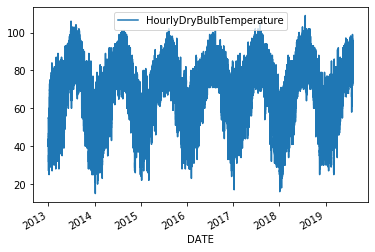

In [12]:
df.plot(x = 'DATE', y = 'HourlyDryBulbTemperature' )


In [13]:
df = df.sort_values("DATE").set_index("DATE")

In [14]:

df =df.HourlyDryBulbTemperature.resample("H").mean()

In [16]:
df

DATE
2013-01-01 00:00:00    55.000000
2013-01-01 01:00:00    55.000000
2013-01-01 02:00:00    55.000000
2013-01-01 03:00:00    54.000000
2013-01-01 04:00:00    51.333333
                         ...    
2019-08-01 19:00:00    89.000000
2019-08-01 20:00:00    80.000000
2019-08-01 21:00:00    80.000000
2019-08-01 22:00:00    80.000000
2019-08-01 23:00:00    79.000000
Freq: H, Name: HourlyDryBulbTemperature, Length: 57696, dtype: float64

In [15]:
df = df.dropna()

In [16]:
train = df.loc["2015-06-01":"2015-08-03"]
test = df.loc["2015-08-04":"2015-08-18"]

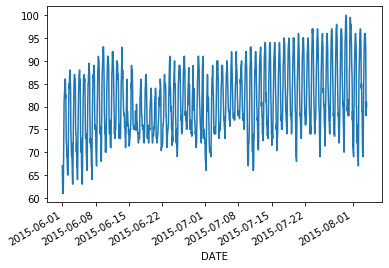

In [17]:
train.plot()

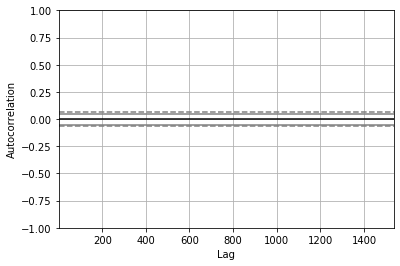

In [31]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.loc["2015-06-01":"2015-08-03"].resample('H').mean())

In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit(start_ar_lags =13, disp=0)
print(model_fit.summary())

                                 ARIMA Model Results                                  
Dep. Variable:     D.HourlyDryBulbTemperature   No. Observations:                 1534
Model:                         ARIMA(1, 1, 1)   Log Likelihood               -3420.095
Method:                               css-mle   S.D. of innovations              2.249
Date:                        Thu, 13 Aug 2020   AIC                           6848.190
Time:                                14:30:39   BIC                           6869.533
Sample:                                     1   HQIC                          6856.132
                                                                                      
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0037      0.140      0.026      0.979      -0.271       0.278
a

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


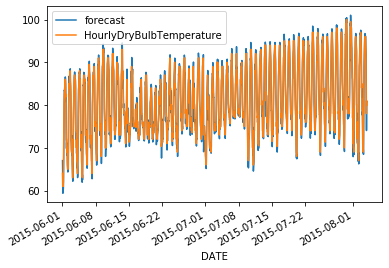

In [34]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [35]:
fc, se, conf = model_fit.forecast(360, alpha=0.05)

In [36]:
fc_series = pd.Series(fc, index=test.index)

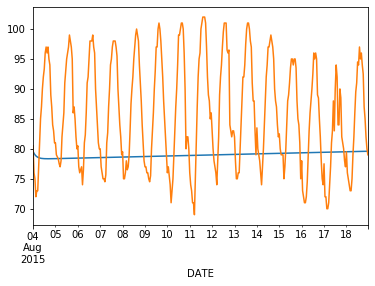

In [37]:
fc_series.plot()
test.plot()

In [121]:
yhat_train = train + train.diff(24).mean()

In [122]:
train.diff(24).mean()

0.1532097948378557

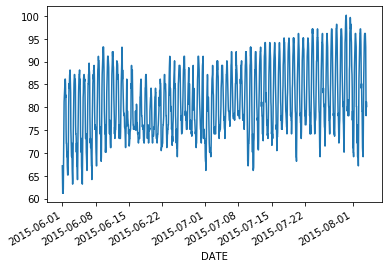

In [123]:
yhat_train.plot()

In [41]:
yhat_test = yhat_train.loc['2015-06-01':'2015-06-15']

In [43]:
yhat_test.index = test.index

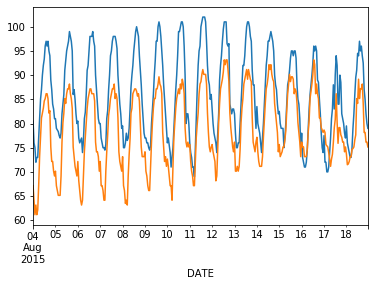

In [46]:
test.plot()
yhat_test.plot()

In [18]:
test

DATE
2015-08-04 00:00:00    80.5
2015-08-04 01:00:00    76.0
2015-08-04 02:00:00    75.0
2015-08-04 03:00:00    72.0
2015-08-04 04:00:00    73.0
                       ... 
2015-08-18 19:00:00    87.0
2015-08-18 20:00:00    85.0
2015-08-18 21:00:00    82.0
2015-08-18 22:00:00    80.0
2015-08-18 23:00:00    79.0
Name: HourlyDryBulbTemperature, Length: 360, dtype: float64

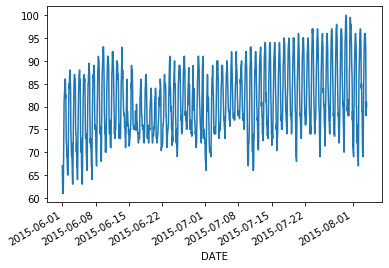

In [51]:
train.plot()

In [19]:
n = 15
temp = []
for i in range(0, 24*n):
    if i <= 23:
#         print(i)
#         print(train.iloc[-24 + i])
        temp.append(train.iloc[-24 + i] + train.diff(24).mean())
#         print(temp[i])
    else:
#         print(temp[i-24])
        temp.append(temp[i-24] + train.diff(24).mean())



In [21]:
predicted = pd.DataFrame(temp, index = test.index, columns = ['predicted'])

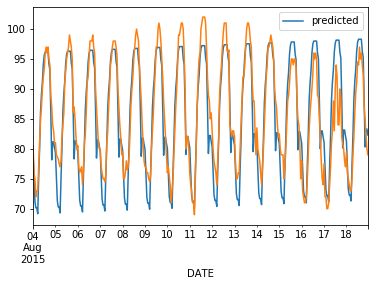

In [22]:
predicted.plot()
test.plot()

In [82]:
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [83]:
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [23]:
import math
from sklearn.metrics import mean_squared_error
rmse = round(math.sqrt(mean_squared_error(test, temp)), 0)

In [24]:
rmse

4.0

In [28]:
readings = ['1/3/2012 16:00:00\t26.96', 
            '1/4/2012 16:00:00\t27.47',
            '1/5/2012 16:00:00\t27.728', 
            '1/6/2012 16:00:00\t28.19', 
            '1/9/2012 16:00:00\t28.1', 
            '1/10/2012 16:00:00\t28.15',
            '1/11/2012 16:00:00\t27.98',
            '1/12/2012 16:00:00\t28.02', 
            '1/13/2012 16:00:00\t28.25', 
            '1/17/2012 16:00:00\t28.65', 
            '1/18/2012 16:00:00\t28.4', 
            '1/19/2012 16:00:00\t28.435',
            '1/20/2012 16:00:00\t29.74', 
            '1/23/2012 16:00:00\t29.95', 
            '1/24/2012 16:00:00\t29.5703',
            '1/25/2012 16:00:00\t29.65', 
            '1/26/2012 16:00:00\t29.7', 
            '1/27/2012 16:00:00\t29.53',
            '1/30/2012 16:00:00\t29.62',
            '1/31/2012 16:00:00\t29.7', 
            '2/1/2012 16:00:00\t30.05', 
            '2/2/2012 16:00:00\t30.17', 
            '2/3/2012 16:00:00\t30.4', 
            '2/6/2012 16:00:00\t30.22',
            '2/7/2012 16:00:00\t30.485',
            '2/8/2012 16:00:00\t30.67', 
            '2/9/2012 16:00:00\t30.8', 
            '2/10/2012 16:00:00\t30.8'
           '1/3/2012 16:00:00\t26.96', 
            '1/4/2012 16:00:00\t27.47',
            '1/5/2012 16:00:00\t27.728', 
            '1/6/2012 16:00:00\t28.19', 
            '1/9/2012 16:00:00\t28.1', 
            '1/10/2012 16:00:00\t28.15',
            '1/11/2012 16:00:00\t27.98',
            '1/12/2012 16:00:00\t28.02', 
            '1/13/2012 16:00:00\t28.25', 
            '1/17/2012 16:00:00\t28.65', 
            '1/18/2012 16:00:00\t28.4', 
            '1/19/2012 16:00:00\t28.435',
            '1/20/2012 16:00:00\t29.74', 
            '1/23/2012 16:00:00\t29.95', 
            '1/24/2012 16:00:00\t29.5703',
            '1/25/2012 16:00:00\t29.65', 
            '1/26/2012 16:00:00\t29.7', 
            '1/27/2012 16:00:00\t29.53',
            '1/30/2012 16:00:00\t29.62',
            '1/31/2012 16:00:00\t29.7', 
            '2/1/2012 16:00:00\t30.05', 
            '2/2/2012 16:00:00\t30.17', 
            '2/3/2012 16:00:00\t30.4', 
            '2/6/2012 16:00:00\t30.22',
            '2/7/2012 16:00:00\t30.485',
            '2/8/2012 16:00:00\t30.67', 
            '2/9/2012 16:00:00\t30.8', 
            '2/10/2012 16:00:00\t30.8']



In [69]:
def prediction(start_date, end_date, df, n):
    from datetime import datetime
    start_date1 = start_date + ' 00:00:00'
    end_date1 = end_date + ' 00:00:00'

    date1 = datetime.strptime(start_date1, '%Y-%m-%d %H:%M:%S')
    date2 = datetime.strptime(end_date1, '%Y-%m-%d %H:%M:%S')


    temp = df.loc[date1:date2]
#     temp['date'] = pd.to_datetime(temp['date'])
#     temp = temp.sort_values("date").set_index("date")
#     temp['temp'] = temp['temp'].astype(float)
    n = 15
    pred = []
    for i in range(0, 24*n):
        if i <= 23:
            pred.append(temp.iloc[-24 + i] + temp.diff(24).mean())
        else:
            pred.append(pred[i-24] + temp.diff(24).mean())
    return pred

    

In [70]:
prediction('2015-06-01', '2015-08-03', df, 15)

[69.15557795698925,
 69.15557795698925,
 69.15557795698925,
 69.15557795698925,
 67.15557795698925,
 75.15557795698925,
 80.15557795698925,
 86.15557795698925,
 88.15557795698925,
 91.15557795698925,
 93.15557795698925,
 95.15557795698925,
 96.15557795698925,
 96.15557795698925,
 97.15557795698925,
 97.15557795698925,
 96.15557795698925,
 93.65557795698925,
 87.15557795698925,
 84.15557795698925,
 85.15557795698925,
 81.15557795698925,
 79.15557795698925,
 79.15557795698925,
 69.3111559139785,
 69.3111559139785,
 69.3111559139785,
 69.3111559139785,
 67.3111559139785,
 75.3111559139785,
 80.3111559139785,
 86.3111559139785,
 88.3111559139785,
 91.3111559139785,
 93.3111559139785,
 95.3111559139785,
 96.3111559139785,
 96.3111559139785,
 97.3111559139785,
 97.3111559139785,
 96.3111559139785,
 93.8111559139785,
 87.3111559139785,
 84.3111559139785,
 85.3111559139785,
 81.3111559139785,
 79.3111559139785,
 79.3111559139785,
 69.46673387096774,
 69.46673387096774,
 69.46673387096774,
 69.

In [38]:
start_date = '1/3/2012' + ' 00:00:00'

In [39]:
start_date

'1/3/2012 00:00:00'

In [40]:
train

DATE
2015-06-01 00:00:00    67.0
2015-06-01 01:00:00    64.0
2015-06-01 02:00:00    61.0
2015-06-01 03:00:00    63.0
2015-06-01 04:00:00    61.0
                       ... 
2015-08-03 19:00:00    86.0
2015-08-03 20:00:00    78.0
2015-08-03 21:00:00    81.0
2015-08-03 22:00:00    81.0
2015-08-03 23:00:00    80.0
Name: HourlyDryBulbTemperature, Length: 1535, dtype: float64

In [59]:
date1 = '2015-06-01 00:00:00'
date2 = datetime.strptime(date1, '%Y-%m-%d %H:%M:%S')

In [62]:
date2

datetime.datetime(2015, 6, 1, 0, 0)